<a href="https://colab.research.google.com/github/gabriel-ggpk/DrivenFy-live/blob/master/Projeto_Redes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 15.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=85b471e737c87f2152bd2b71788a192de04c48c000932d221939d491979bc4c8
  Stored in directory: /root/.cache/pip/wheels/9a/b8/0f/f580817231cbf59f6ade9fd132ff60ada1de9f7dc85521f857
Successfully built emoji


In [2]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd

import re
import pickle
import emoji
import regex as re
from sklearn.model_selection import train_test_split

In [4]:
def preProcess(text):
  text = text.lower() # convert to lowercase
  text = re.sub(r'[^a-zA-Z0-9\s]', '', text) # remove punctuation and special characters
  text = re.sub(r'\s+', ' ', text) # remove extra whitespace
  text = re.sub(r'https?://\S+', '', text) # remove URLs
  text = re.sub(r"#", "", text)
  text = emoji.demojize(text)
  return text

In [7]:
tweets = pd.read_csv("/content/gdrive/MyDrive/ColabNotebooks/datasets/tweets.csv")
tweets['text'] = tweets['text'].apply(preProcess)
X = tweets['text']
y = tweets['target']
vocab_size = 15000 #28000
embedding_dim = 100 #3000
max_length = 280
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [8]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

# Create a tokenizer object
tokenizer = Tokenizer(num_words=vocab_size)

# Fit the tokenizer on the training data
tokenizer.fit_on_texts(X_train)
# Convert the training and testing data to sequences of token IDs
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to a fixed length
train_padded = pad_sequences(train_sequences, maxlen=max_length)
test_padded = pad_sequences(test_sequences, maxlen=max_length)

Epoch 1/10
4/4 [==============================] - 9s 2s/step - loss: 0.6880 - accuracy: 0.5512 - val_loss: 0.6260 - val_accuracy: 0.7778
Epoch 2/10
4/4 [==============================] - 5s 1s/step - loss: 0.5869 - accuracy: 0.8343 - val_loss: 0.5993 - val_accuracy: 0.8238
Epoch 3/10
4/4 [==============================] - 7s 2s/step - loss: 0.5380 - accuracy: 0.8500 - val_loss: 0.5692 - val_accuracy: 0.8288
Epoch 4/10
4/4 [==============================] - 8s 2s/step - loss: 0.4962 - accuracy: 0.8403 - val_loss: 0.5423 - val_accuracy: 0.8279
Epoch 5/10
4/4 [==============================] - 7s 2s/step - loss: 0.4614 - accuracy: 0.8409 - val_loss: 0.5234 - val_accuracy: 0.8297
Epoch 6/10
4/4 [==============================] - 6s 2s/step - loss: 0.4277 - accuracy: 0.8539 - val_loss: 0.5110 - val_accuracy: 0.8326
Epoch 7/10
4/4 [==============================] - 6s 2s/step - loss: 0.3905 - accuracy: 0.8868 - val_loss: 0.5049 - val_accuracy: 0.8408
Epoch 8/10
4/4 [=========================

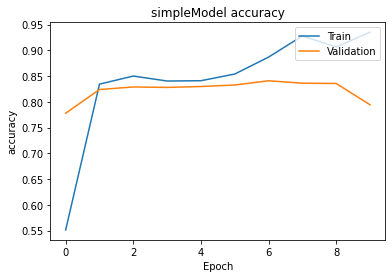

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN
import matplotlib.pyplot as plt

# Using a simpleRNN initially
simpleModel = Sequential()
simpleModel.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
simpleModel.add(SimpleRNN(units=16))
simpleModel.add(Dense(units=1, activation='sigmoid'))

# Compile the simpleModel
simpleModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the simpleModel
history = simpleModel.fit(train_padded, y_train, epochs=10, batch_size=2048, validation_data=(test_padded, y_test))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('simpleModel accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Epoch 1/10
63/63 [==============================] - 12s 149ms/step - loss: 0.5230 - accuracy: 0.7993 - val_loss: 0.3860 - val_accuracy: 0.8270
Epoch 2/10
63/63 [==============================] - 8s 125ms/step - loss: 0.2970 - accuracy: 0.8745 - val_loss: 0.2941 - val_accuracy: 0.8909
Epoch 3/10
63/63 [==============================] - 9s 141ms/step - loss: 0.1820 - accuracy: 0.9452 - val_loss: 0.2844 - val_accuracy: 0.8965
Epoch 4/10
63/63 [==============================] - 9s 142ms/step - loss: 0.1115 - accuracy: 0.9706 - val_loss: 0.2936 - val_accuracy: 0.9033
Epoch 5/10
63/63 [==============================] - 8s 126ms/step - loss: 0.0697 - accuracy: 0.9853 - val_loss: 0.3204 - val_accuracy: 0.8977
Epoch 6/10
63/63 [==============================] - 9s 144ms/step - loss: 0.0436 - accuracy: 0.9911 - val_loss: 0.3373 - val_accuracy: 0.8930
Epoch 7/10
63/63 [==============================] - 9s 145ms/step - loss: 0.0304 - accuracy: 0.9937 - val_loss: 0.3729 - val_accuracy: 0.8915
Epoch

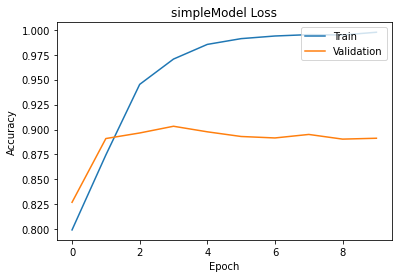

In [9]:

from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
import matplotlib.pyplot as plt

# Using a lstm
lstm = Sequential()
lstm.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
lstm.add(LSTM(units=16))
lstm.add(Dense(units=1, activation='sigmoid'))

# Compile the lstm
lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the lstm
history = lstm.fit(train_padded, y_train, epochs=10, batch_size=128, validation_data=(test_padded, y_test))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('lstm Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

(7959, 280)
Epoch 1/10
63/63 [==============================] - 18s 236ms/step - loss: 0.5442 - accuracy: 0.8014 - val_loss: 0.4123 - val_accuracy: 0.8244
Epoch 2/10
63/63 [==============================] - 14s 231ms/step - loss: 0.3362 - accuracy: 0.8491 - val_loss: 0.3289 - val_accuracy: 0.8663
Epoch 3/10
63/63 [==============================] - 15s 233ms/step - loss: 0.1793 - accuracy: 0.9339 - val_loss: 0.3201 - val_accuracy: 0.8775
Epoch 4/10
63/63 [==============================] - 15s 236ms/step - loss: 0.0951 - accuracy: 0.9685 - val_loss: 0.3460 - val_accuracy: 0.8757
Epoch 5/10
63/63 [==============================] - 17s 264ms/step - loss: 0.0550 - accuracy: 0.9854 - val_loss: 0.3952 - val_accuracy: 0.8830
Epoch 6/10
63/63 [==============================] - 15s 236ms/step - loss: 0.0331 - accuracy: 0.9910 - val_loss: 0.4356 - val_accuracy: 0.8739
Epoch 7/10
63/63 [==============================] - 15s 232ms/step - loss: 0.0227 - accuracy: 0.9950 - val_loss: 0.4846 - val_accu

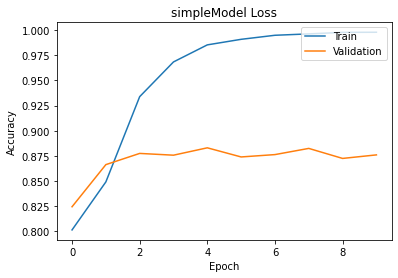

In [ ]:

from keras.models import Sequential
from keras.layers import Dense, Embedding, GRU
import matplotlib.pyplot as plt

# Using a GRU
print(train_padded.shape)
GRU = Sequential()
GRU.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
GRU.add(GRU(units=16))
GRU.add(Dense(units=1, activation='sigmoid'))

# Compile the GRU
GRU.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the GRU
history = GRU.fit(train_padded, y_train, epochs=10, batch_size=128, validation_data=(test_padded, y_test))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('GRU accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()